# First look at MOM6 output
A series of commands to quickly look at the output of a MOM6 simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
rootdir = '/archive/gam/MOM6-gm/'
model = 'ocean-only'
config = 'box/dev_core'
filename_prog = 'ocean_6hourly.nc'
# filename_prog_2d = 'prog_2d.nc'
# filename_vgrid = 'Vertical_coordinate.nc'
filename_hgrid = 'ocean_static.nc'
# filename_stats = 'ocean.stats.nc'

In [3]:
prog=xr.open_dataset(rootdir+model+'/'+config+'/'+filename_prog,decode_times=False)
print(prog)

<xarray.Dataset>
Dimensions:                         (nv: 2, time: 4, xh: 20, yh: 20, zl: 20)
Coordinates:
  * xh                              (xh) float64 0.25 0.75 1.25 ... 9.25 9.75
  * yh                              (yh) float64 0.25 0.75 1.25 ... 9.25 9.75
  * zl                              (zl) float64 5.0 15.0 25.0 ... 185.0 195.0
  * time                            (time) float64 0.125 0.375 0.625 0.875
  * nv                              (nv) float64 1.0 2.0
Data variables:
    temp                            (time, zl, yh, xh) float32 ...
    opottemptend                    (time, zl, yh, xh) float32 ...
    opottempdiff                    (time, zl, yh, xh) float32 ...
    opottemppmdiff                  (time, zl, yh, xh) float32 ...
    boundary_forcing_heat_tendency  (time, zl, yh, xh) float32 ...
    frazil_heat_tendency            (time, zl, yh, xh) float32 ...
    T_advection_xy                  (time, zl, yh, xh) float32 ...
    Th_tendency_vert_remap          (time

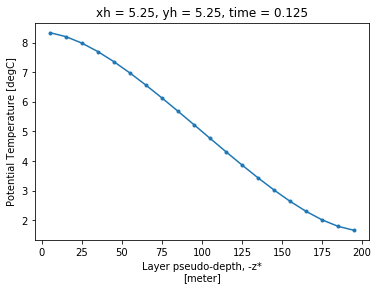

In [4]:
prog['temp'].isel(xh=10,yh=10,time=0).plot(linestyle='-',marker='.')

In [9]:
# prog_2d=xr.open_dataset(rootdir+config+'/'+filename_prog_2d,decode_times=False)
# print(prog_2d.heat_added)

In [ ]:
stats=xr.open_dataset(rootdir+config+'/'+filename_stats)
#print(stats)

In [15]:
hgrid=xr.open_dataset(rootdir+config+'/'+filename_hgrid)
# vgrid=xr.open_dataset(rootdir+config+'/'+filename_vgrid)
#print(hgrid)
#print(vgrid)

# Plan view at different moments in time

In [53]:
# Plan view of  of variable at start and end of simulation
def draw_var_times_plan(var,clim,times,invert):
    nt = np.size(times)
    fig,ax = plt.subplots(figsize=(10,3*nt),nrows=np.size(times))
    for t in range(nt):
        im = ax[t].pcolormesh(hgrid.lonh,hgrid.lath,var.sel(Time=times[t],method='nearest'),cmap="RdBu_r")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[t])
        ax[t].set_title(times[t])
        if invert:
            ax[t].invert_yaxis()
    return fig

In [54]:
get_times = [0,1800]

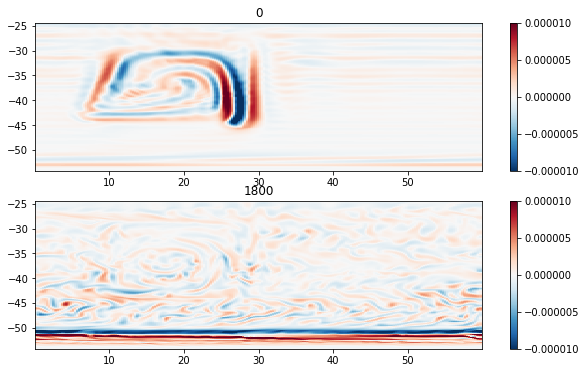

In [55]:
fig=draw_var_times_plan(var=prog.RV.isel(zl=10),clim=[-1E-5,1E-5],times=get_times,invert=False)
#fig.savefig()

In [49]:
draw_var_times_plan(var=prog_2d.heat_added,clim=[-1,1],times=get_times,invert=False)

NameError: name 'prog_2d' is not defined

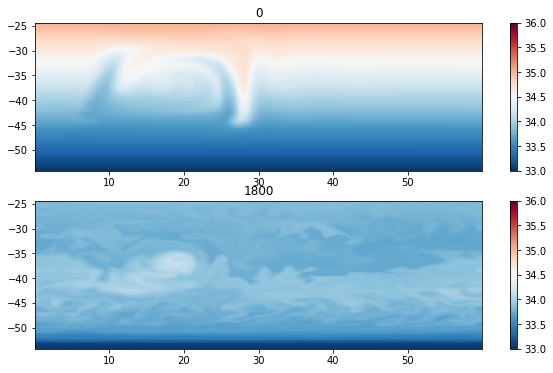

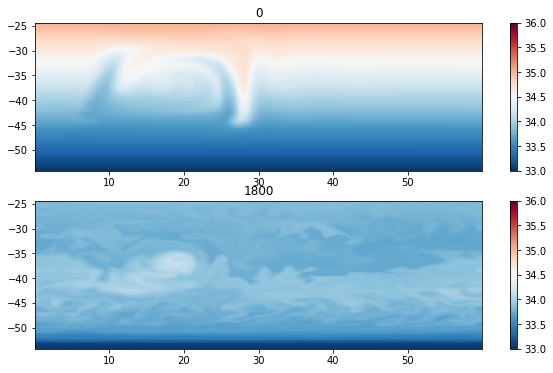

In [71]:
draw_var_times_plan(var=prog.salt.isel(zl=10),clim=[33,36],times=get_times,invert=False)

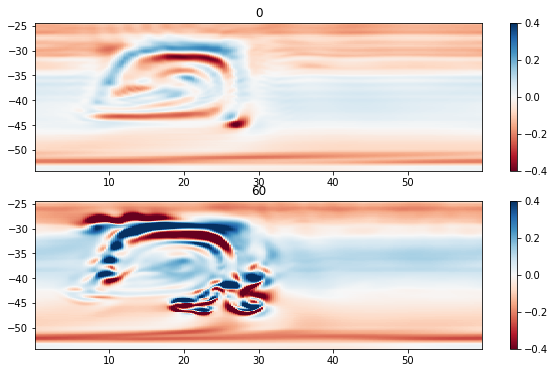

In [28]:
fig=draw_var_times_plan(var=prog.u.sel(zl=0,method='nearest'),clim=[-0.4,0.4],times=get_times,invert=False)

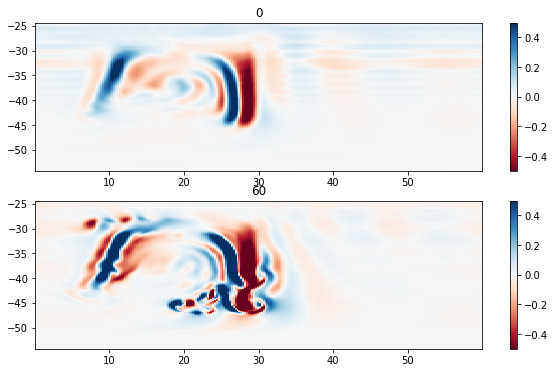

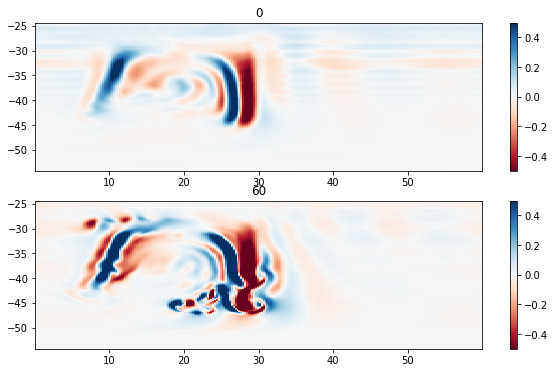

In [29]:
draw_var_times_plan(var=prog.v.isel(zl=20),clim=[-0.5,0.5],times=get_times,invert=False)

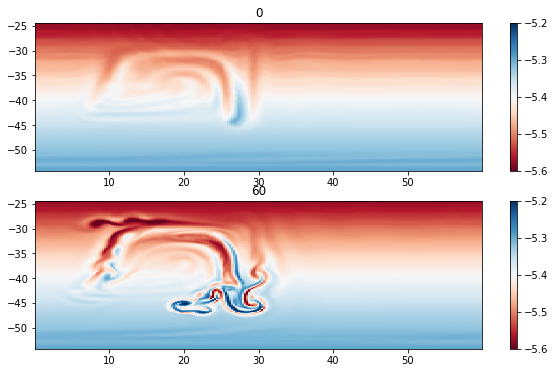

In [30]:
fig=draw_var_times_plan(var=xr.ufuncs.log10(-prog.PV.sel(zl=100,method='nearest')),clim=[-5.6,-5.2],times=get_times,invert=False)

In [62]:
# Plan view of  of variable at start and end of simulation
def draw_var_times_latdep(var,clim,times,invert):
    nt = np.size(times)
    fig,ax = plt.subplots(figsize=(10,3*nt),nrows=np.size(times))
    for t in range(nt):
        im = ax[t].pcolormesh(hgrid.lath,var.zl,var.sel(Time=times[t],method='nearest'),cmap="RdBu_r")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[t])
        ax[t].set_title(times[t])
        if invert:
            ax[t].invert_yaxis()

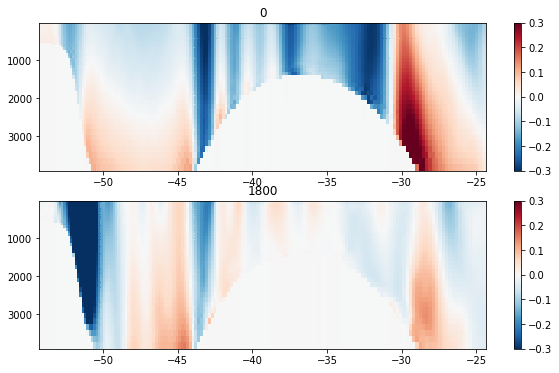

In [63]:
draw_var_times_latdep(var=prog.u.isel(xq=60),clim=[-0.3,0.3],times=get_times,invert=True)

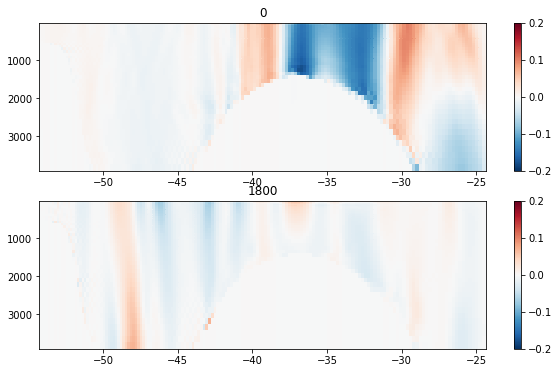

In [64]:
draw_var_times_latdep(var=prog.v.isel(xh=60),clim=[-0.2,0.2],times=get_times,invert=True)

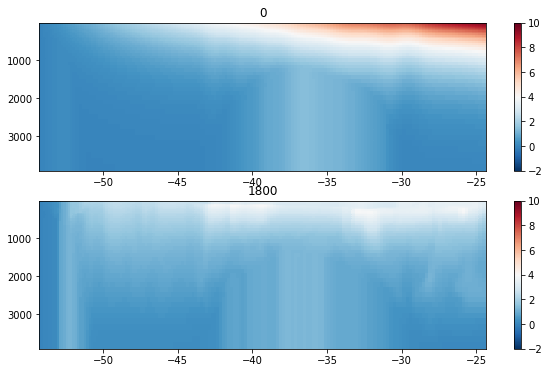

In [65]:
draw_var_times_latdep(var=prog.temp.isel(xh=60),clim=[-2,10],times=get_times,invert=True)

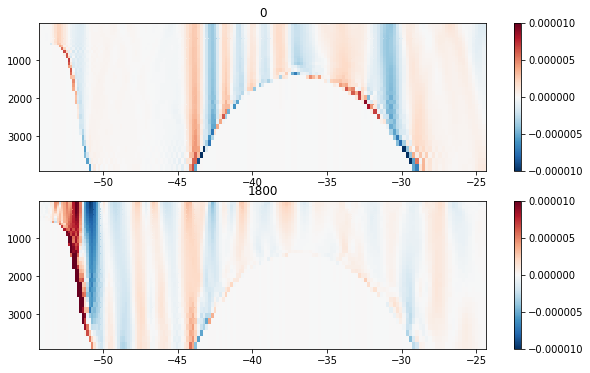

In [66]:
draw_var_times_latdep(var=prog.RV.isel(xq=60),clim=[-1E-5,1E-5],times=get_times,invert=True)

# Depth slices at a single moment in time

In [67]:
# Section (lat-lon) of variable at different depths
def draw_var_depths(var,clim,depths):
    nk = np.size(depths)
    fig,ax = plt.subplots(figsize=(10,3*nk),nrows=np.size(depths))
    for d in range(nk):
        im = ax[d].pcolormesh(var.isel(zl=depths[d]),cmap="RdBu")
        im.set_clim(vmin=clim[0],vmax=clim[1])
        cbar = plt.colorbar(im,ax=ax[d])
        ax[d].set_title(depths[d])

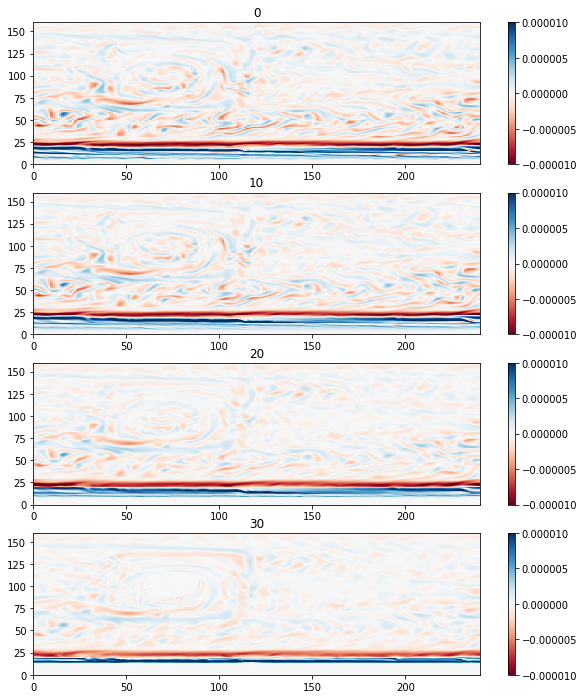

In [68]:
draw_var_depths(var=prog.RV.isel(Time=59),clim=[-1E-5,1E-5],depths=[0, 10, 20, 30])

# Kinetic energy over time

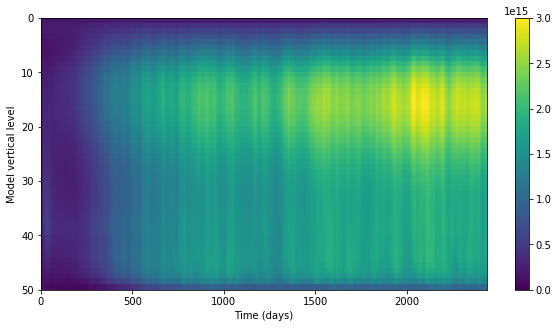

In [68]:
fig,ax = plt.subplots(figsize=(10,5),nrows=1)
im = ax.pcolormesh(stats.KE.transpose())
ax.invert_yaxis()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Model vertical level')
im.set_clim([0,3e15])
cbar = plt.colorbar(im,ax=ax)

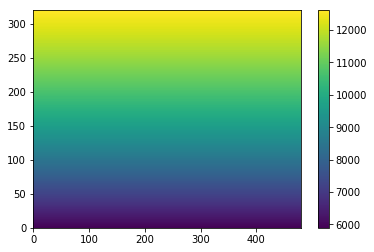

In [26]:
plt.pcolormesh(hgrid.dxT)
plt.colorbar()